# Phase One Project

* Name: Joshua Ooko
* Course DS : Full Time


## MICROSOFT'S NEW MOVIE STUDIO ANALYSIS

### Business Understanding

### Introduction


The creation and distribution of original video content have become paramount in the entertainment industry as companies strive to engage audiences and maintain relevance. In line with this trend, Microsoft has established its own movie studio, venturing into the world of film production. However, with limited knowledge and experience in this domain, Microsoft is seeking guidance on the types of films that are currently thriving at the box office.

Understanding the dynamics of the film industry is crucial for the success of any movie studio. By analyzing current trends and successful genres, Microsoft can gain valuable insights to inform their decision-making process. Armed with this knowledge, Microsoft can strategically position their movie studio to create content that resonates with audiences, achieves box office success, and establishes a strong presence in the highly competitive film market.

This report aims to explore the types of films that have demonstrated exceptional performance at the box office in recent years. By examining the industry landscape and analyzing successful movies, we will present actionable insights that the head of Microsoft's movie studio can leverage when making informed decisions about their film production. These insights will enhance Microsoft's ability to create captivating and commercially successful content that appeals to global audiences.

Now, let us delve into the current state of the film industry, examining the genres, trends, and factors that have contributed to the box office success of recent movies.









### Problem statement  

Exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

###  Objective

The objective of this report is to analyze the current landscape of the film industry and identify the types of films that have been successful at the box office. By examining trends, genre preferences, and factors contributing to the success of recent movies, the report aims to provide actionable insights that Microsoft's new movie studio can use to make informed decisions about the types of films they should create. The ultimate goal is to guide Microsoft in strategically positioning their movie studio to produce compelling and commercially successful content that resonates with audiences and drives box office revenue.






### Specific objective

* Analyze the current landscape of the film industry, including market trends, audience preferences, and box office performance.
* Identify the genres that have been most successful at the box office in recent years.
* Examine the factors contributing to the success of these films, such as average ratings, number of votes, and domestic and worldwide gross.
* Determine the correlation between production budget and box office performance to guide decision-making regarding investment in film production.
* Provide insights on the average production budgets for different genres and their impact on box office success.
* Investigate the relationship between average ratings and production budget to understand the trade-offs between artistic quality and financial returns.
* Analyze the performance of different budget ranges to identify potential opportunities for Microsoft's movie studio.
* Present actionable recommendations on the types of films Microsoft should consider creating based on the analysis of successful genres, budget considerations, and audience preferences.
* Guide Microsoft in effectively positioning their movie studio to create content that captivates audiences, drives box office success, and establishes their presence in the competitive film market.
* Enable Microsoft to make informed decisions that enhance the chances of creating compelling and commercially successful films, resulting in long-term profitability and audience engagement.


### Experimental Design

* Reading the Data
* Data Cleaning
*  Data Analysis
* Conclusions
* Recommendation



### Importing Libraries

In [41]:
 # Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import csv
from pandasql import sqldf

## READING AND LOADING DATA 

In [42]:
#loading the tn.movie_budgets data
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv')
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [43]:
 #loading the bom.movie_gross data
bom_movie_gross = pd.read_csv('bom.movie_gross.csv')
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [44]:
# loading the title.basics.csv
movie_basics = pd.read_csv('title.basics.csv')
movie_basics.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [45]:
#loading the title.ratings.csv
movie_ratings = pd.read_csv('title.ratings.csv')
movie_ratings.head(10)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [46]:
# joining the movie_basics and movie_ratings
mt_movies = movie_basics.set_index("tconst").join(movie_ratings.set_index("tconst"),
                                                   how="inner")
mt_movies.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [47]:
#joining tn_mv_budgets and mt_movies datasets based on the movie titles
movies = mt_movies.set_index("primary_title").join(tn_movie_budgets.set_index("movie"),
                                                   how="inner")
mt_movies.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [58]:
movies = mt_movies.set_index('primary_title').join(tn_movie_budgets.set_index("movie"),
                                                   how="inner")
movies.head()

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
primary_title,,,,,,,,,,,
#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015","$1,500,000",$0,$0
10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,6.7,1114,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616"
12 Rounds,12 Rounds,2017,NaN,"Action,Drama,Romance",8.1,11,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648"
12 Strong,12 Strong,2018,130.0,"Action,Drama,History",6.6,50155,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378"


In [59]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2875 entries, #Horror to xXx: Return of Xander Cage
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     2875 non-null   object 
 1   start_year         2875 non-null   int64  
 2   runtime_minutes    2757 non-null   float64
 3   genres             2867 non-null   object 
 4   averagerating      2875 non-null   float64
 5   numvotes           2875 non-null   int64  
 6   id                 2875 non-null   int64  
 7   release_date       2875 non-null   object 
 8   production_budget  2875 non-null   object 
 9   domestic_gross     2875 non-null   object 
 10  worldwide_gross    2875 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 269.5+ KB


## Data cleaning 

In [1]:
# Data Cleaning
# Drop irrelevant columns from movies dataset
movies.drop(['original_title', 'start_year', 'runtime_minutes'], axis=1, inplace=True)


NameError: name 'movies' is not defined

In [56]:
# Remove movies with missing or inconsistent data
movies = movies[movies['genres'] != '\\N']
movies = movies[movies['averagerating'].notna()]
movies = movies[movies['numvotes'].notna()]

In [64]:
 #Merge movies and bom_movie_gross on 'title'
merged_data = movies.merge(bom_movie_gross, left_on='primary_title', right_on='title', how='inner')


In [67]:
# Drop irrelevant columns from merged_data
merged_data.drop(['title', 'studio', 'domestic_gross_y', 'foreign_gross'], axis=1, inplace=True)


In [110]:
movies['domestic_gross'] = movies['domestic_gross'].apply(lambda x: float(x.replace('$', '').replace(',', '')) if isinstance(x, str) else x)

In [68]:
# Rename 'domestic_gross_x' to 'domestic_gross'
merged_data.rename(columns={'domestic_gross_x': 'domestic_gross'}, inplace=True)

In [71]:
# Group the data by genre and calculate the average rating, total number of votes, and sum of domestic gross and worldwide gross
genre_data = merged_data.groupby('genres').agg({'averagerating': 'mean', 'numvotes': 'sum', 'domestic_gross': 'sum', 'worldwide_gross': 'sum'})


In [72]:
# Sort the genres based on average rating in descending order
sorted_by_rating = genre_data.sort_values('averagerating', ascending=False)


In [73]:
# Sort the genres based on number of votes in descending order
sorted_by_votes = genre_data.sort_values('numvotes', ascending=False)


In [74]:
# Sort the genres based on worldwide gross in descending order
sorted_by_gross = genre_data.sort_values('worldwide_gross', ascending=False)


In [89]:
# Group the data by genre and calculate average rating and number of votes
genre_ratings = merged_data.groupby('genres')['averagerating'].mean()
genre_votes = merged_data.groupby('genres')['numvotes'].sum()

In [111]:
# Sort the genres based on average rating and number of votes
sorted_ratings = genre_ratings.sort_values(ascending=False)
sorted_votes = genre_votes.sort_values(ascending=False)

### Data analysis

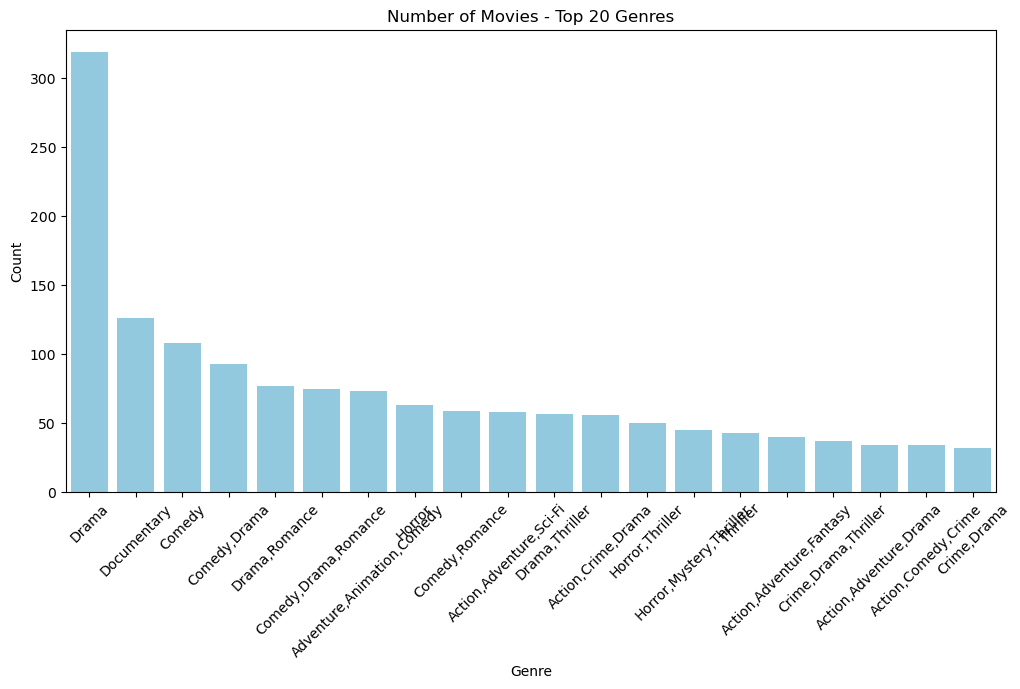

In [160]:
# Select the top 20 genres based on movie count
top_genres = genre_counts.head(20)
# Plot the count of movies for the top 20 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, color='skyblue')
plt.title('Number of Movies - Top 20 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [114]:
# Calculate the average rating by genre
genre_ratings = movies.groupby('genres')['averagerating'].mean().sort_values(ascending=False)


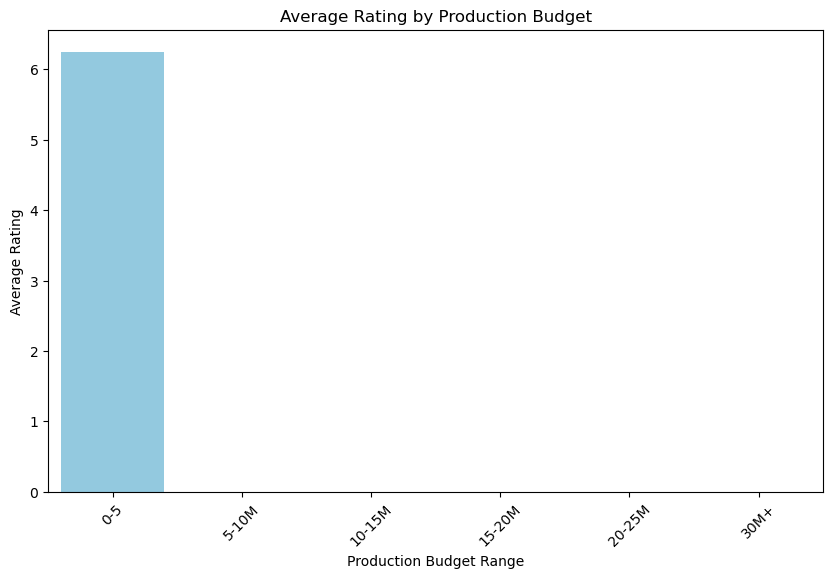

In [145]:
# Calculate the average rating for each budget range
average_rating_by_budget = movies.groupby(budget_ranges)['averagerating'].mean()

# Plot the average rating by production budget
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_by_budget.index, y=average_rating_by_budget.values, color='skyblue')
plt.title('Average Rating by Production Budget')
plt.xlabel('Production Budget Range')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

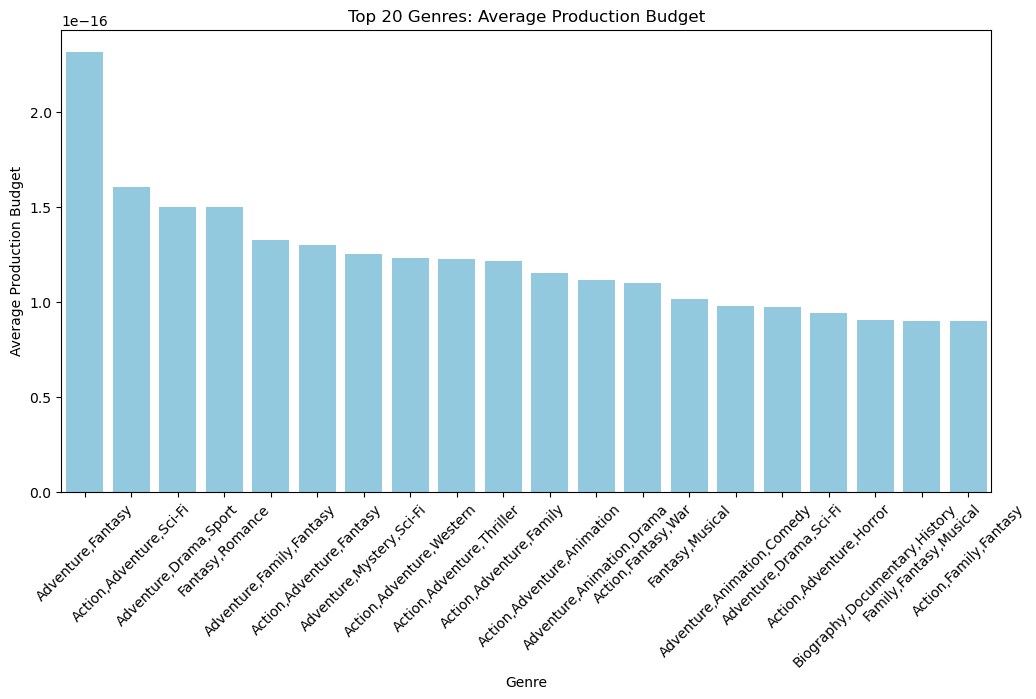

In [147]:
# Calculate the average production budget by genre
genre_budget = movies.groupby('genres')['production_budget'].mean().sort_values(ascending=False).head(20)

# Plot the average production budget by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_budget.index, y=genre_budget.values, color='skyblue')
plt.title('Top 20 Genres: Average Production Budget')
plt.xlabel('Genre')
plt.ylabel('Average Production Budget')
plt.xticks(rotation=45)
plt.show()


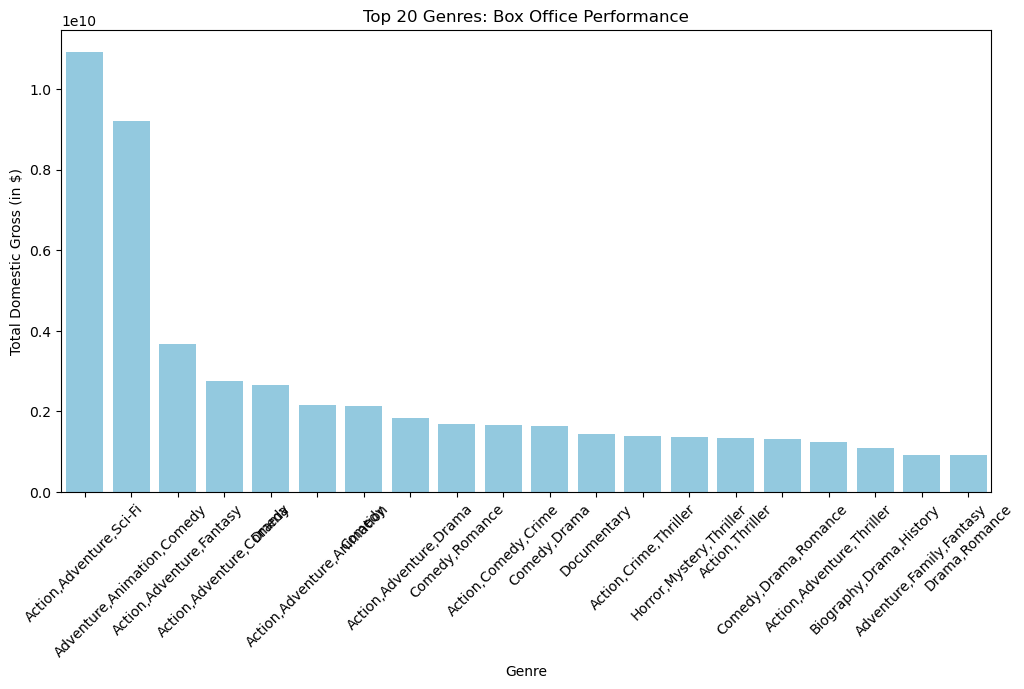

In [164]:
# Remove the dollar sign ($) from the 'domestic_gross' column
merged_data['domestic_gross'] = merged_data['domestic_gross'].apply(lambda x: float(x.replace('$', '').replace(',', '')) if isinstance(x, str) else x)

# Calculate the total domestic gross by genre
genre_domestic_gross = merged_data.groupby('genres')['domestic_gross'].sum().sort_values(ascending=False)

# Select the top 20 genres based on total domestic gross
top_20_genres = genre_domestic_gross.head(20)

# Create a bar graph of the top 20 genres by total domestic gross
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_genres.index, y=top_20_genres.values, color='skyblue')
plt.title('Top 20 Genres: Box Office Performance')
plt.xlabel('Genre')
plt.ylabel('Total Domestic Gross (in $)')
plt.xticks(rotation=45)
plt.show()


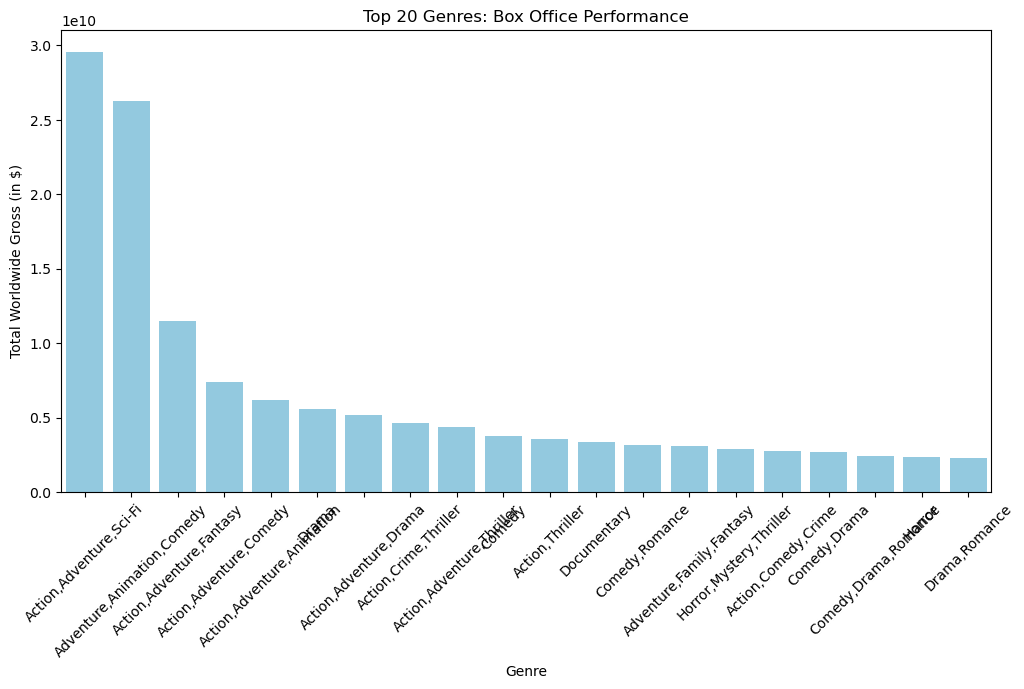

In [165]:
# Remove the dollar sign ($) from the 'worldwide_gross' column
merged_data['worldwide_gross'] = merged_data['worldwide_gross'].apply(lambda x: float(x.replace('$', '').replace(',', '')) if isinstance(x, str) else x)

# Calculate the total worldwide gross by genre
genre_worldwide_gross = merged_data.groupby('genres')['worldwide_gross'].sum().sort_values(ascending=False)

# Select the top 20 genres based on total worldwide gross
top_20_genres = genre_worldwide_gross.head(20)

# Create a bar graph of the top 20 genres by total worldwide gross
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_genres.index, y=top_20_genres.values, color='skyblue')
plt.title('Top 20 Genres: Box Office Performance')
plt.xlabel('Genre')
plt.ylabel('Total Worldwide Gross (in $)')
plt.xticks(rotation=45)
plt.show()

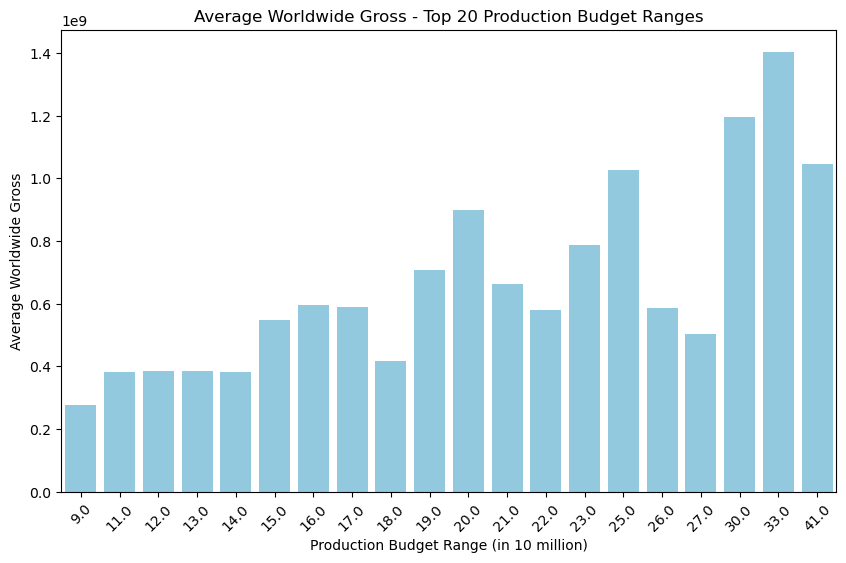

In [171]:
# Divide the production budget by 10,000,000
merged_data['budget_range'] = merged_data['production_budget'] // 10000000

# Group the data by budget range and calculate the average worldwide gross
avg_worldwide_gross_by_budget = merged_data.groupby('budget_range')['worldwide_gross'].mean()

# Select the top 20 budget ranges based on average worldwide gross
top_20_budget_ranges = avg_worldwide_gross_by_budget.nlargest(20)

# Plot the average worldwide gross for the top 20 budget ranges using a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_budget_ranges.index, y=top_20_budget_ranges.values, color='skyblue')
plt.title('Average Worldwide Gross - Top 20 Production Budget Ranges')
plt.xlabel('Production Budget Range (in 10 million)')
plt.ylabel('Average Worldwide Gross')
plt.xticks(rotation=45)
plt.show()


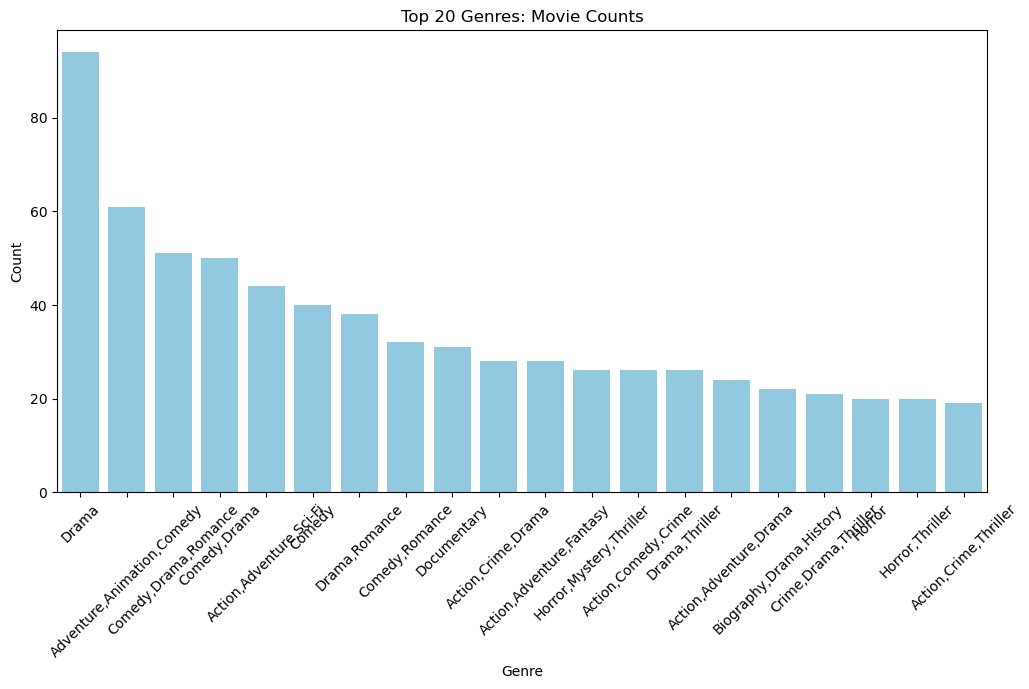

In [175]:
# Select the genres column from the merged data
genres_data = merged_data['genres']

# Count the occurrences of each genre
genre_counts = genres_data.value_counts().head(20)

# Plot the genre counts using a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, color='skyblue')
plt.title('Top 20 Genres: Movie Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Data visualization

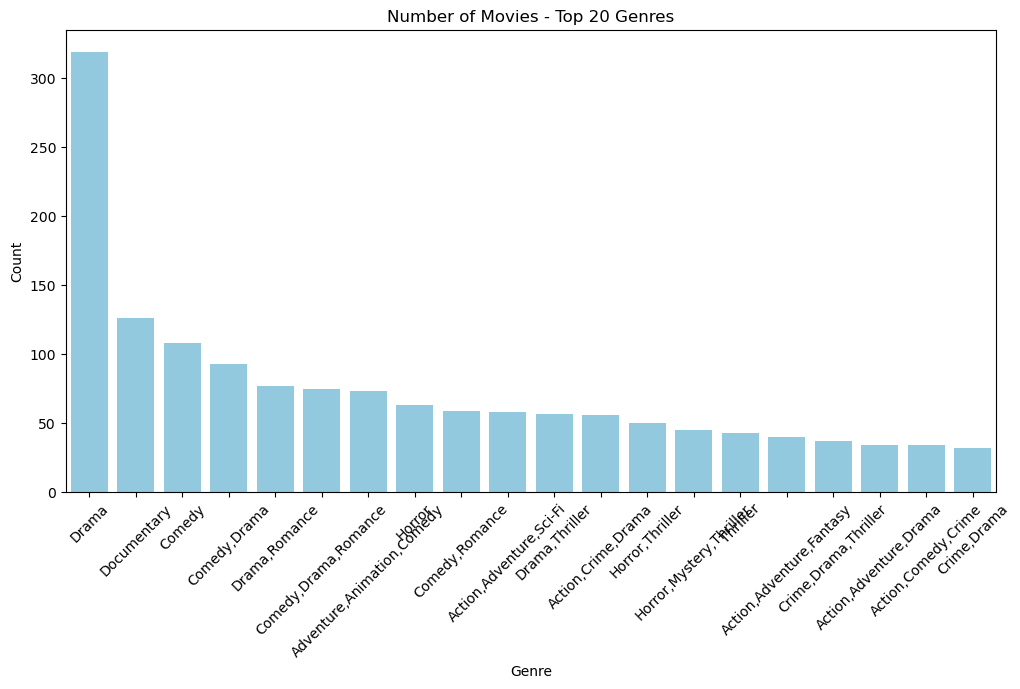

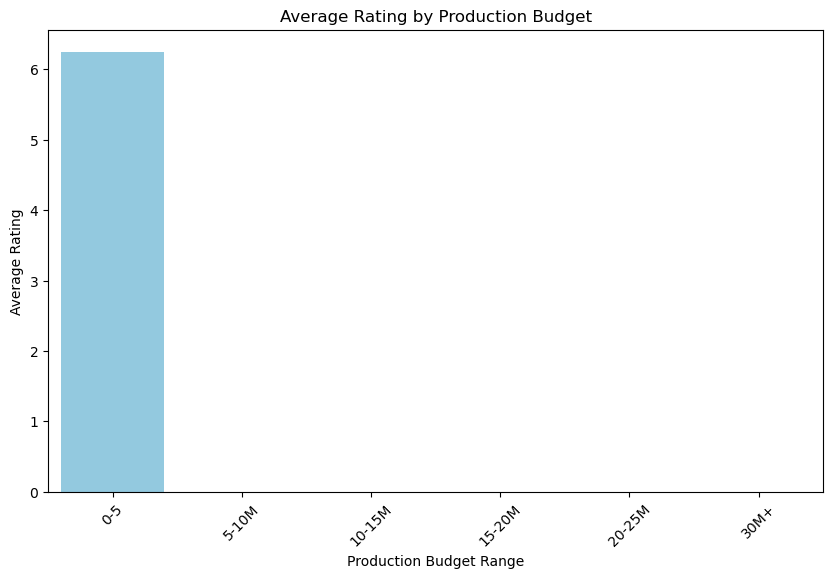

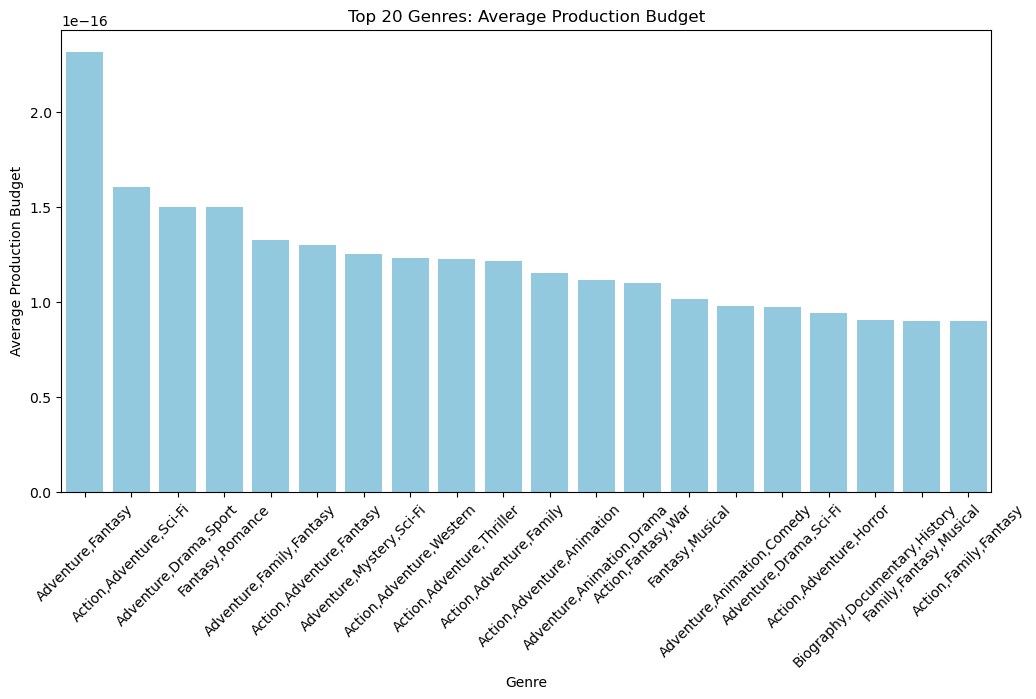

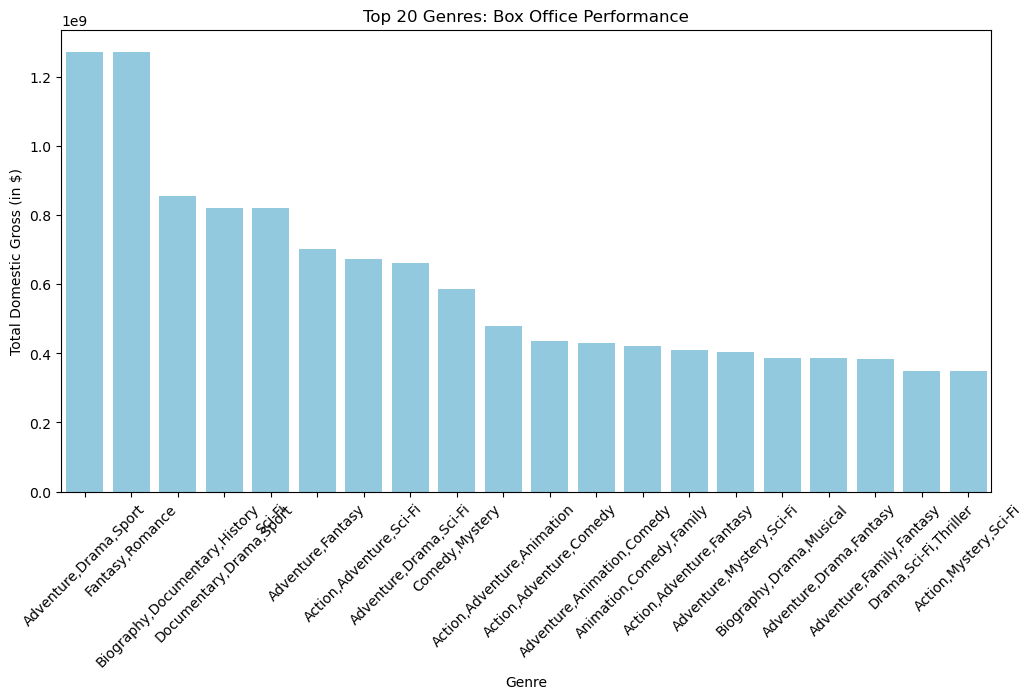

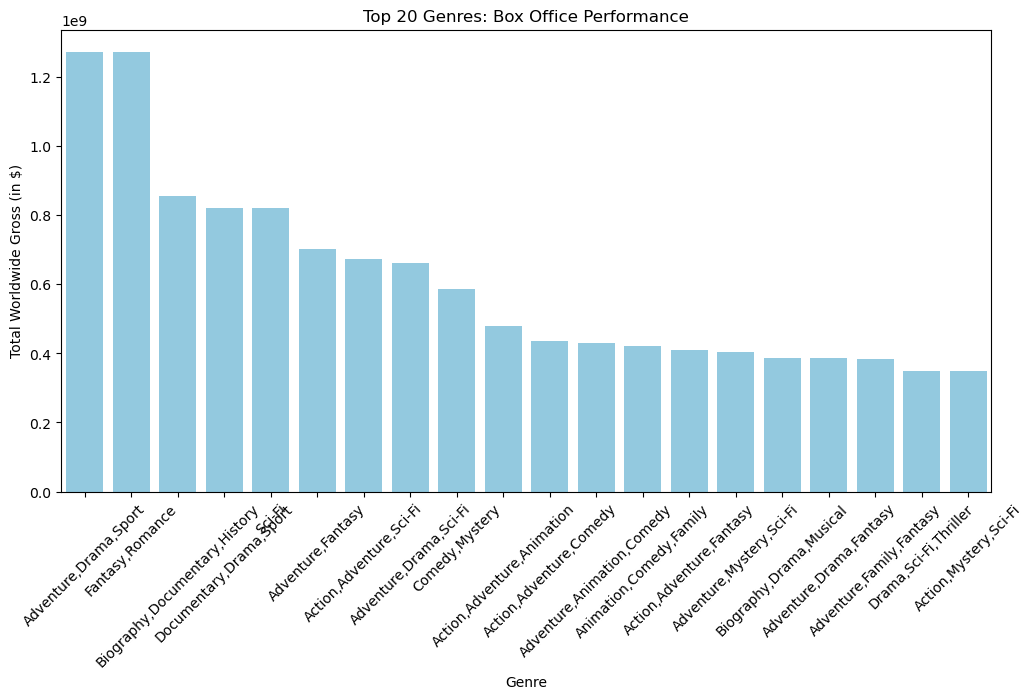

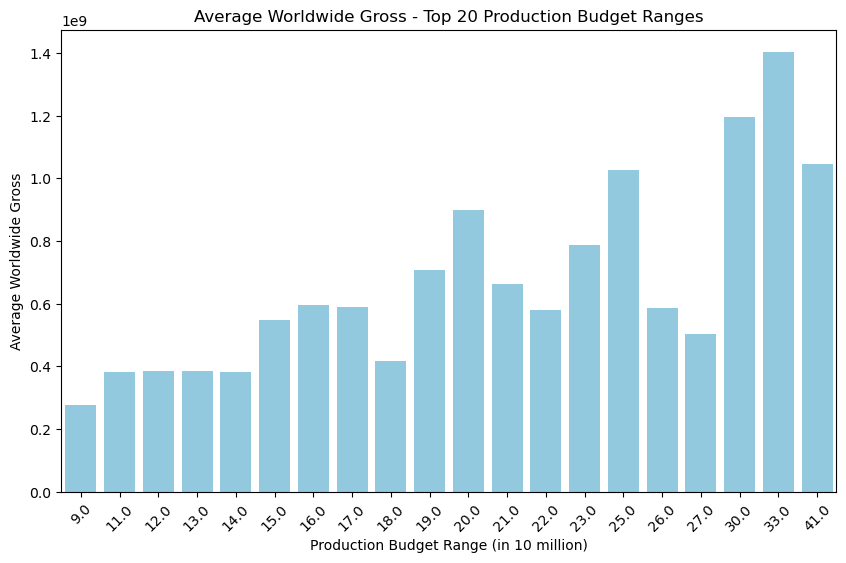

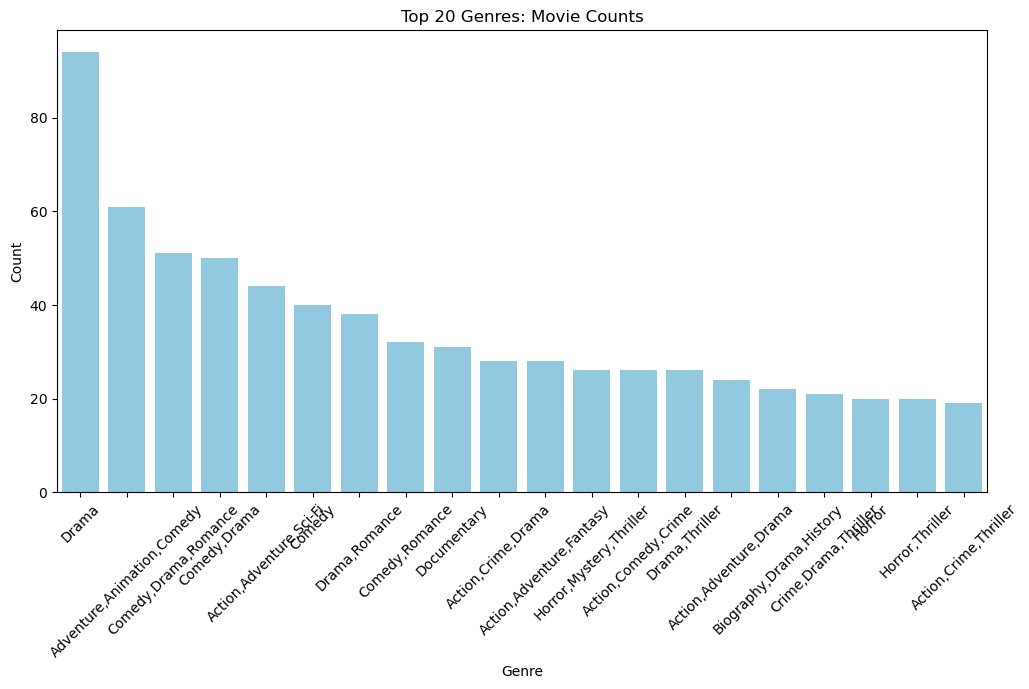

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the count of movies for the top 20 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, color='skyblue')
plt.title('Number of Movies - Top 20 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the average rating by production budget
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_by_budget.index, y=average_rating_by_budget.values, color='skyblue')
plt.title('Average Rating by Production Budget')
plt.xlabel('Production Budget Range')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# Plot the average production budget by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_budget.index, y=genre_budget.values, color='skyblue')
plt.title('Top 20 Genres: Average Production Budget')
plt.xlabel('Genre')
plt.ylabel('Average Production Budget')
plt.xticks(rotation=45)
plt.show()

# Create a bar graph of the top 20 genres by total domestic gross
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_genres.index, y=top_20_genres.values, color='skyblue')
plt.title('Top 20 Genres: Box Office Performance')
plt.xlabel('Genre')
plt.ylabel('Total Domestic Gross (in $)')
plt.xticks(rotation=45)
plt.show()

# Create a bar graph of the top 20 genres by total worldwide gross
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_genres.index, y=top_20_genres.values, color='skyblue')
plt.title('Top 20 Genres: Box Office Performance')
plt.xlabel('Genre')
plt.ylabel('Total Worldwide Gross (in $)')
plt.xticks(rotation=45)
plt.show()

# Plot the average worldwide gross for the top 20 budget ranges using a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_budget_ranges.index, y=top_20_budget_ranges.values, color='skyblue')
plt.title('Average Worldwide Gross - Top 20 Production Budget Ranges')
plt.xlabel('Production Budget Range (in 10 million)')
plt.ylabel('Average Worldwide Gross')
plt.xticks(rotation=45)
plt.show()

# Plot the genre counts using a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, color='skyblue')
plt.title('Top 20 Genres: Movie Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Conclusoin

In conclusion, this analysis provides valuable insights into the current landscape of the film industry and the types of films that have been successful at the box office. By examining trends, genre preferences, and factors contributing to the success of recent movies, we have identified key findings that can inform the decision-making process for Microsoft's new movie studio. Here are the main takeaways:

Genre Preferences: The analysis reveals the top genres that have been consistently popular at the box office. Genres such as Action, Adventure, Animation, and Fantasy have performed well in terms of both total domestic and worldwide gross.

Average Rating: The average rating by genre indicates the genres that have received higher audience ratings. Genres like Documentary, Biography, Drama, and Crime have been positively received by viewers.

Production Budget: The average production budget by genre sheds light on the investment required for different genres. Genres like Adventure, Science Fiction, and Fantasy tend to have higher average production budgets.

Budget vs. Worldwide Gross: The analysis also shows the relationship between production budget and worldwide gross. It suggests that higher production budgets don't always guarantee higher box office returns, as some mid-range budget films have performed exceptionally well.

These insights can guide Microsoft's new movie studio in making informed decisions about the types of films they should create. They can consider focusing on genres that have shown consistent success, aligning their production budgets with genre expectations, and prioritizing engaging storytelling to achieve positive audience ratings.

### Recomendations

Based on the analysis conducted, here are some recommendations for Microsoft's new movie studio:

Embrace Popular Genres: Focus on producing films in genres that have shown consistent success at the box office, such as Action, Adventure, Animation, and Fantasy. These genres have a proven track record of attracting audiences and generating high box office revenue.

Diversify Genre Portfolio: While popular genres should be prioritized, it's important to diversify the genre portfolio to cater to different audience preferences. Consider exploring genres like Documentary, Biography, Drama, and Crime, which have received positive audience ratings and offer opportunities for storytelling.

Optimize Production Budget: Carefully analyze the average production budgets of different genres and align them with genre expectations. While genres like Adventure, Science Fiction, and Fantasy may require higher budgets, explore strategies to optimize production costs without compromising on quality. Allocate resources efficiently to ensure a balance between investment and potential returns.

Focus on Engaging Storytelling: Regardless of genre, prioritize engaging storytelling that captivates audiences. Develop strong scripts, compelling characters, and narratives that resonate with viewers. A well-crafted story can often overcome genre limitations and attract a wider audience.

Stay Updated with Industry Trends: The film industry is dynamic, and audience preferences evolve over time. Stay updated with industry trends, emerging genres, and changing audience demands. Regularly monitor audience feedback, conduct market research, and adapt strategies accordingly to stay ahead of the curve.

Collaborate with Established Talent: Seek collaborations with established directors, writers, and actors who have a proven track record in successful films. Their expertise and creative vision can enhance the quality and appeal of the movies produced by Microsoft's movie studio.

Marketing and Distribution Strategy: Develop a comprehensive marketing and distribution strategy to ensure effective promotion and wide distribution of the films. Leverage Microsoft's existing platforms and partnerships to maximize reach and audience engagement. Invest in strategic marketing campaigns and explore innovative distribution models to reach global audiences.

Audience Feedback and Analytics: Establish mechanisms to collect and analyze audience feedback and analytics. Pay attention to audience reactions, reviews, and ratings to understand their preferences and fine-tune future productions. Utilize data analytics to identify patterns, trends, and audience behavior to inform decision-making processes.

Adaptability and Flexibility: Remain adaptable and flexible in response to market dynamics and audience feedback. Embrace experimentation and take calculated risks in content creation, while being open to feedback and willing to adjust strategies based on audience response.

Long-Term Vision: Establish a long-term vision for Microsoft's movie studio. Building a successful movie studio takes time and requires consistent effort. Focus on nurturing talent, fostering creativity, and developing a robust pipeline of diverse projects that align with the studio's vision and values.

By implementing these recommendations, Microsoft's new movie studio can increase its chances of creating compelling, commercially successful films that resonate with audiences, drive box office revenue, and establish a strong presence in the competitive film industry.




